In [1]:
import pickle
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '/Users/lhao/Documents/Git/py_Halo-GEM/ecpy')

In [2]:
from curate_kcat_light_goslim_asc_step02 import *

In [4]:
results02 = pickle.load(open('../Results/smc_abc_light_step_02.pkl','rb'))

# Compare the mean kcat values. You can extract them directly from results.posterior. 
# or use results02.population.
#     data structure: [{((rxn_id,prot_id):kcat)}]*100. kcat is in the unit of 1/h
#     To calculate the mean in thel log10 space, firstly use np.mean(log10(x))

kcat_model = [item.loc for item in results02.posterior.values()] # those values are log10 transformed 1/h
kcat_model = [10**item/3600 for item in  kcat_model] # convert it to 1/s

In [15]:
# load prior, do not use results.prior, as it was not the real prior. forgot to use .copy in the very begining
model_one_pool_file = '../Results/template_ecModel_one_pool.pkl'
tmp_ecmodel = pickle.load(open(model_one_pool_file,'rb'))
df_enz_kcat = pd.read_csv('../Results/mapped_kcats_updated_with_ko.csv',index_col=0)

priors = build_priors(tmp_ecmodel,df_enz_kcat)

In [16]:
kcat_model_prior = [item.loc for item in priors.values()] # those values are log10 transformed 1/h
kcat_model_prior = [10**item/3600 for item in  kcat_model_prior] # convert it to 1/s

In [11]:
kcatDB = pd.read_csv('../../../ComplementaryData/max_KCAT.txt',sep = '\t',header=None)
ecoli_kcat = kcatDB[kcatDB[2].str.contains('escherichia coli')][3].values
#bac_kcat = kcatDB[kcatDB[2].str.contains('bacteria')][3].values

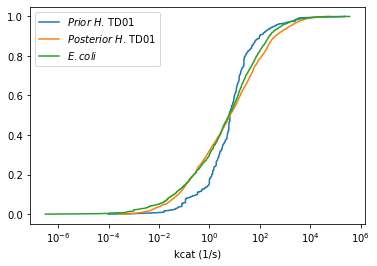

In [18]:
X_model = np.sort(kcat_model)
Y_model = np.array(range(len(X_model)))/float(len(X_model))

X_model_prior = np.sort(kcat_model_prior)
Y_model_prior = np.array(range(len(X_model_prior)))/float(len(X_model_prior))

X_ecoli = np.sort(ecoli_kcat)
Y_ecoli = np.array(range(len(X_ecoli)))/float(len(X_ecoli))

#X_bac = np.sort(bac_kcat)
#Y_bac = np.array(range(len(X_bac)))/float(len(X_bac))

#X_all = np.sort(kcatDB[3].values)
#Y_all = np.array(range(len(X_all)))/float(len(X_all))

plt.plot(X_model_prior  , Y_model_prior  ,label = '$Prior$ $H$. TD01')
plt.plot(X_model, Y_model,label = '$Posterior$ $H$. TD01') #
plt.plot(X_ecoli, Y_ecoli,label = '$E. coli$')

#plt.plot(X_all  , Y_all  ,label = 'All')

plt.xscale('log')
plt.legend(loc=0)
plt.xlabel('kcat (1/s)')
plt.show()
plt.close()

### GoSlim
The file is `../proteomics/go-slim-in model.xlsx`

In [ ]:
kcat_model

In [8]:
kcatDB.head()

,0,1,2,3,4
0,EC1.1.1.1,(2e)-but-2-en-1-ol,yokenella sp.//*//*,101.0,*
1,EC1.1.1.1,(2e)-but-2-enal,yokenella sp.//*//*,405.0,*
2,EC1.1.1.1,(r)-1-indanol,sulfolobus acidocaldarius//prokaryotes;archaea...,7.1,*
3,EC1.1.1.1,(r)-2-butanol,equus caballus//eukaryotes;animals;vertebrates...,2.0,*
4,EC1.1.1.1,(r)-2-butanol,sulfolobus solfataricus//prokaryotes;archaea;c...,1.0,*


In [10]:
ecoli_kcat

,0,1,2,3,4
391,EC1.1.1.100,ethyl acetoacetate,escherichia coli//prokaryotes;bacteria;gammapr...,0.300,*
393,EC1.1.1.100,nadph,escherichia coli//prokaryotes;bacteria;gammapr...,0.590,*
401,EC1.1.1.103,l-threonine,escherichia coli k-12//prokaryotes;bacteria;ga...,135.000,*
475,EC1.1.1.136,nad+,escherichia coli//prokaryotes;bacteria;gammapr...,1.410,*
477,EC1.1.1.136,udp-n-acetyl-d-glucosamine,escherichia coli//prokaryotes;bacteria;gammapr...,0.970,*
623,EC1.1.1.154,(s)-ureidoglycolate,escherichia coli//prokaryotes;bacteria;gammapr...,57.000,*
624,EC1.1.1.154,nad+,escherichia coli//prokaryotes;bacteria;gammapr...,62.000,*
625,EC1.1.1.159,chenodeoxycholic acid,escherichia coli//prokaryotes;bacteria;gammapr...,8.180,*
626,EC1.1.1.159,cholic acid,escherichia coli//prokaryotes;bacteria;gammapr...,151.000,*
627,EC1.1.1.159,glycocholic acid,escherichia coli//prokaryotes;bacteria;gammapr...,0.417,*
